In [1]:
from functions import *
import numpy as np
import pandas as pd

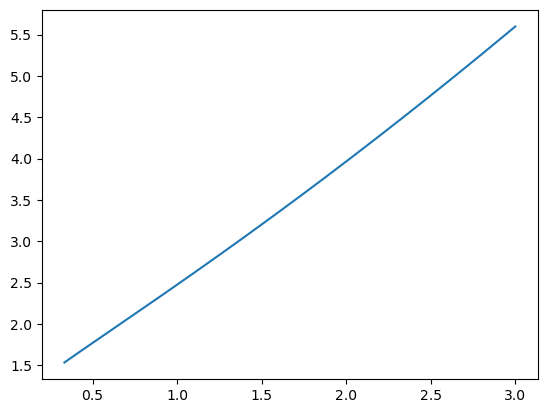

In [23]:
plot(Pi, start=1/3, end=3, i=4)

In [28]:
for i in range(4, 0, -1):
    print("dmp{}_max = {}".format(i, dp(min_max_dict["sm{}_min".format(i)]) * min_max_dict["smp{}_max".format(i)]))

for i in range(0, 5):
    print("dp{}_max = {}".format(i, dp(min_max_dict["s{}_max".format(i)]) * min_max_dict["sp{}_max".format(i)]))

dmp4_max = 236773303270.587
dmp3_max = 164804.19767536205
dmp2_max = 98.46015365963227
dmp1_max = 1.8230635748846775
dp0_max = 0.08888888888888889
dp1_max = 0.01713237783297246
dp2_max = 0.0004866287596302319
dp3_max = 1.271998163566851e-07
dp4_max = 3.955779294589308e-15


In [38]:
for i in range(4):
    print(f"F{i}_max =", sum([min_max_dict[f"cp{n}_max"] / 
                              (min_max_dict[f"c{n}_min"] - 1)
                              for n in range(i + 1)]))

F0_max = 2.517669814306786
F1_max = 7.638502898665833
F2_max = 58.1556144364953
F3_max = 8279.046835730309


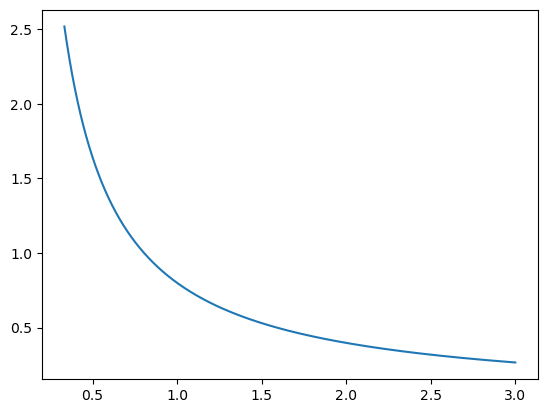

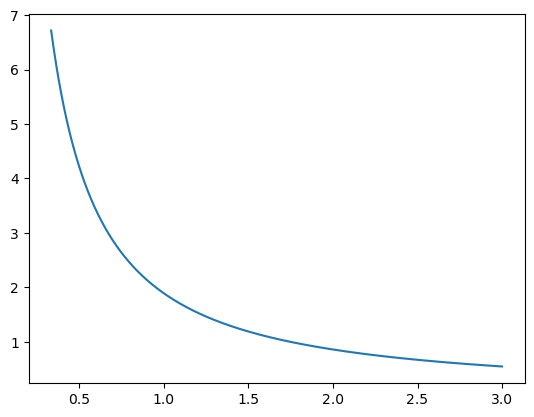

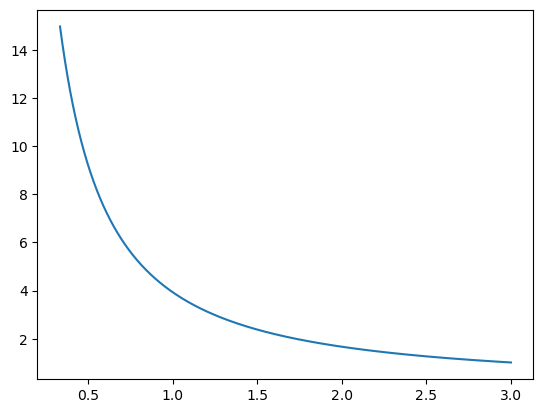

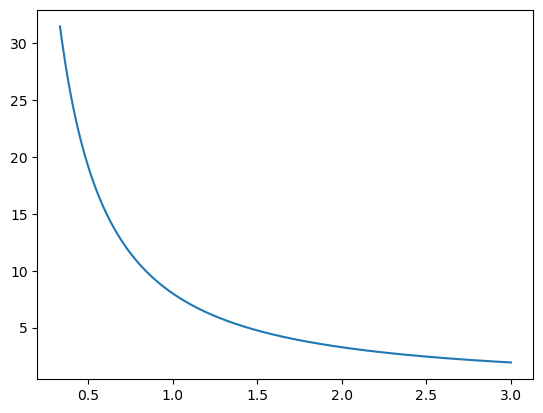

In [34]:
for i in range(0, 4):
    plot(Fi, start=1/3, end=3, i=i)

In [10]:
my_bisection(Mp54_wrapper(Mp), 0.5, 0.6, 1e-10)

0.5794127464294433

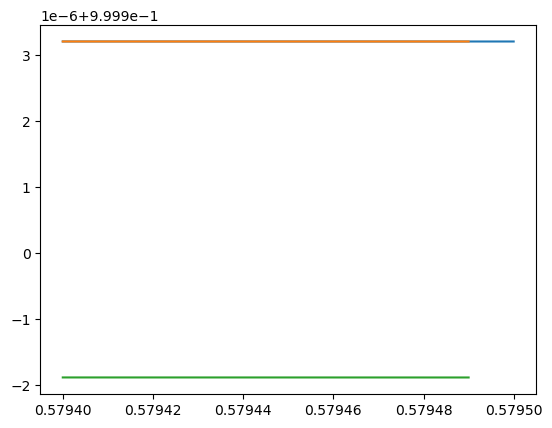

In [19]:
plot_w_bound(start=0.5794, end=0.5795, n_partition=10)